<a href="https://colab.research.google.com/github/kwasicode/Artificial-Intelligence/blob/main/Wind_turbine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Import TensorFlow and dependencies

In [387]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Upload the dataframe csv file

In [388]:
dataset = pd.read_csv('/content/wind_dat_4.csv')
dataset

,Time,Gearbox Temp,Generator Temp,Bearing Temp,Wind Speed,Power Output,Failure
0,1,0.35,-1.73,0.35,-0.35,-0.73,0
1,2,0.69,-1.73,-0.35,1.16,1.22,0
2,3,0.17,-1.73,-1.05,0.23,1.22,0
3,4,-0.52,1.73,1.05,-0.93,-1.47,0
4,5,-1.04,1.73,0.69,-1.86,0.41,1
...,...,...,...,...,...,...,...
125,126,0.35,-1.73,0.35,-0.35,-0.73,0
126,127,0.69,-1.73,-0.35,1.16,1.22,0
127,128,0.17,-1.73,-1.05,0.23,1.22,0
128,129,-0.52,1.73,1.05,-0.93,-1.47,0


Data preparation

In [389]:
# Function to generate input/output sequences
def to_windows(df, sequence_length):
    X = []
    y = []

    for i in range(len(df) - sequence_length):
        seq = df.iloc[i:i+sequence_length].values
        label = df.iloc[i+sequence_length]['Failure']

        X.append(seq)
        y.append(label)

    return np.array(X), np.array(y)

In [390]:
print("Original dataset shape:", dataset.shape)
print("Sample data from the dataset:", dataset[:5])

Original dataset shape: (130, 7)
Sample data from the dataset:    Time  Gearbox Temp  Generator Temp  Bearing Temp  Wind Speed  Power Output  \
0     1          0.35           -1.73          0.35       -0.35         -0.73   
1     2          0.69           -1.73         -0.35        1.16          1.22   
2     3          0.17           -1.73         -1.05        0.23          1.22   
3     4         -0.52            1.73          1.05       -0.93         -1.47   
4     5         -1.04            1.73          0.69       -1.86          0.41   

   Failure  
0        0  
1        0  
2        0  
3        0  
4        1  


In [391]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (128, 2, 7)
y shape: (128,)


In [392]:
seq_length = 2
X, y = to_windows(dataset, seq_length)

train_split = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_split)

Build LSTM model

In [393]:
model = tf.keras.Sequential([
    layers.LSTM(32, return_sequences=True),
    layers.Dropout(0.5),
    layers.LSTM(8),
    layers.Dense(1)
])
model.compile(loss='mae', optimizer='adam',  metrics=['accuracy'])
model

Train model

In [394]:


history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 5s 470ms/step - loss: 0.2526 - accuracy: 0.8395 - val_loss: 0.3018 - val_accuracy: 0.7143
Epoch 2/20
3/3 [==============================] - 0s 20ms/step - loss: 0.2517 - accuracy: 0.8395 - val_loss: 0.3068 - val_accuracy: 0.7143
Epoch 3/20
3/3 [==============================] - 0s 19ms/step - loss: 0.2485 - accuracy: 0.8395 - val_loss: 0.3073 - val_accuracy: 0.7143
Epoch 4/20
3/3 [==============================] - 0s 21ms/step - loss: 0.2375 - accuracy: 0.8395 - val_loss: 0.3208 - val_accuracy: 0.7143
Epoch 5/20
3/3 [==============================] - 0s 20ms/step - loss: 0.2428 - accuracy: 0.8395 - val_loss: 0.3250 - val_accuracy: 0.7143
Epoch 6/20
3/3 [==============================] - 0s 22ms/step - loss: 0.2358 - accuracy: 0.8395 - val_loss: 0.3134 - val_accuracy: 0.7143
Epoch 7/20
3/3 [==============================] - 0s 20ms/step - loss: 0.2175 - accuracy: 0.8395 - val_loss: 0.3210 - val_accuracy: 0.7143
Epoch 8/20
3/3 [==========

Model Evaluation

In [395]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()


Plot Model loss

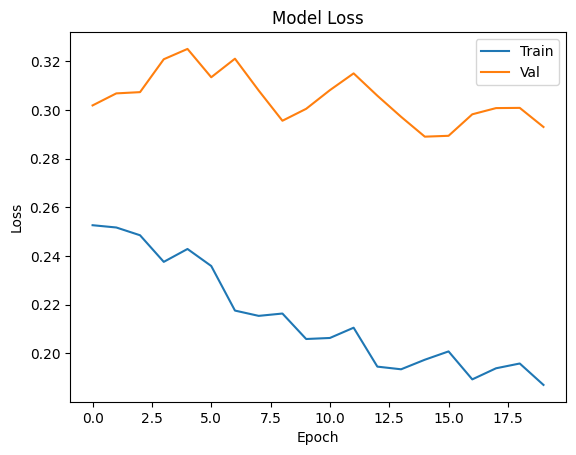

In [396]:
 plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


Evaluate model loss and accuracy

In [397]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

1/1 [==============================] - 0s 29ms/step - loss: 0.2844 - accuracy: 0.7308
Test Loss: 0.2843696177005768
Test Accuracy: 0.7307692170143127


Model predictions

1/1 - 0s - loss: 0.2844 - accuracy: 0.7308 - 22ms/epoch - 22ms/step


1/1 [==============================] - 1s 1s/step


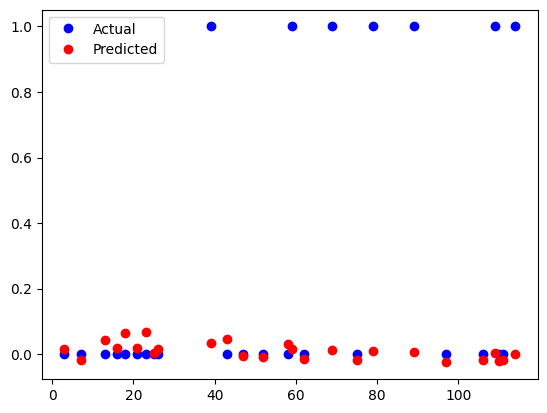

In [398]:
test_scores = model.evaluate(X_test, y_test, verbose=2)

# Plot test set predictions
y_pred = model.predict(X_test)
plt.plot(X_test[:, -1, 0], y_test, 'bo', label="Actual") # x-axis as times
plt.plot(X_test[:, -1, 0], y_pred, 'ro', label="Predicted")
plt.legend()
plt.show()

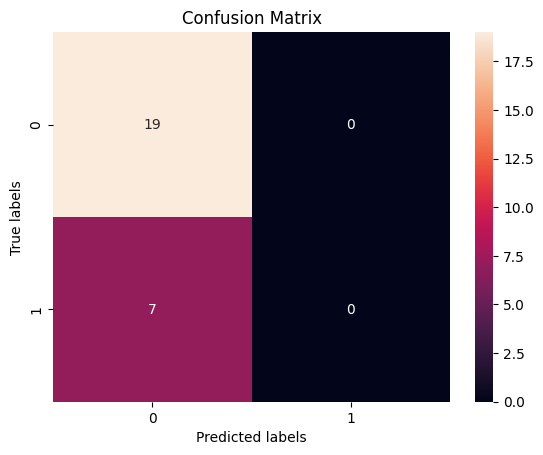

In [404]:
from sklearn.metrics import confusion_matrix

y_pred_labels = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(y_test, y_pred_labels)


import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()